In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train['Sex'].replace(['male',"female"],[1,0] , inplace = True)
test['Sex'].replace(['male',"female"],[1,0] , inplace = True)

<Figure size 1440x720 with 0 Axes>

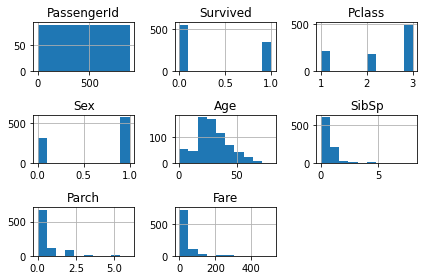

In [4]:
plt.figure(figsize = (20,10))
train.hist()
plt.tight_layout()

In [5]:
train = train.drop(["Ticket","Cabin","Name"], axis = 1)
test = test.drop(["Ticket","Cabin","Name"], axis = 1)

train = train.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [6]:
train.shape

(712, 9)

In [7]:
test.shape

(418, 8)

In [8]:
train = train.drop(["PassengerId"], axis = 1)
test1 = test.drop(["PassengerId"], axis = 1)

In [9]:
X_train = train.drop(["Survived"], axis = 1)
y_train = train["Survived"]

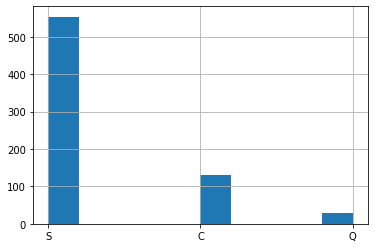

In [10]:
X_train["Embarked"].hist()

X_train['Embarked'].replace(['S',"C","Q"],[0,1,2] , inplace = True)

<AxesSubplot: >

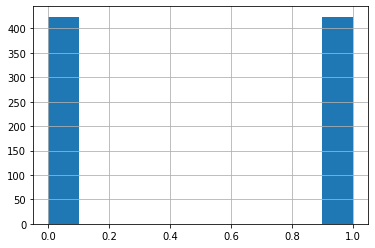

In [11]:
from imblearn.over_sampling import SMOTE
X, y = SMOTE().fit_resample(X_train, y_train)
y.hist()

<AxesSubplot: >

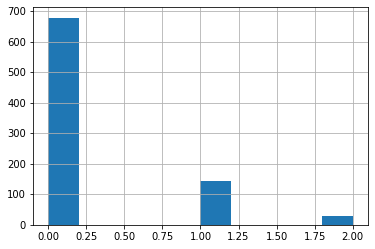

In [12]:
X["Embarked"].hist()

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [14]:
RF = RandomForestClassifier(random_state = 42, n_estimators= 200, max_features = 'auto')
scores = cross_val_score(RF,X,y,cv = 10,scoring = 'accuracy')

C:\Users\KYLE\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\KYLE\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\KYLE\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for Ran

In [15]:
scores.mean()

0.8102941176470588

In [16]:
scores2 = cross_val_score(RF,X_train,y_train,cv = 7,scoring = 'accuracy')

C:\Users\KYLE\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\KYLE\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\KYLE\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for Ran

In [17]:
scores2.mean()

0.788071664309288

In [18]:
'''for i in range(1,10):
    RF = RandomForestClassifier(random_state = 42, n_estimators= 100*i, max_depth = 25)
    scores = cross_val_score(RF,X,y,cv = 10,scoring = 'accuracy')
    print(scores.mean())'''

"for i in range(1,10):\n    RF = RandomForestClassifier(random_state = 42, n_estimators= 100*i, max_depth = 25)\n    scores = cross_val_score(RF,X,y,cv = 10,scoring = 'accuracy')\n    print(scores.mean())"

In [19]:
'''for i in range(1,15):
    RF = RandomForestClassifier(random_state = 42, n_estimators=200, max_depth = 2*i)
    scores = cross_val_score(RF,X,y,cv = 10,scoring = 'accuracy')
    print(scores.mean())'''

"for i in range(1,15):\n    RF = RandomForestClassifier(random_state = 42, n_estimators=200, max_depth = 2*i)\n    scores = cross_val_score(RF,X,y,cv = 10,scoring = 'accuracy')\n    print(scores.mean())"

In [20]:
'''for i in range(1,5):
    RF = RandomForestClassifier(random_state = 42, n_estimators=200, max_depth = 10,max_features = 2*i)
    scores = cross_val_score(RF,X,y,cv = 10,scoring = 'accuracy')
    print(scores.mean())'''

"for i in range(1,5):\n    RF = RandomForestClassifier(random_state = 42, n_estimators=200, max_depth = 10,max_features = 2*i)\n    scores = cross_val_score(RF,X,y,cv = 10,scoring = 'accuracy')\n    print(scores.mean())"

In [21]:
RF = RandomForestClassifier(random_state = 42, n_estimators=200, max_depth = 10,max_features = 4)
scores = cross_val_score(RF,X,y,cv = 10,scoring = 'accuracy')
print(scores.mean())

0.8326750700280112


In [22]:
RF.fit(X,y)

RandomForestClassifier(max_depth=10, max_features=4, n_estimators=200,
                       random_state=42)

In [23]:
X.isnull().mean()

Pclass      0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Fare        0.0
Embarked    0.0
dtype: float64

In [32]:
test1['Embarked'].replace(['S',"C","Q"],[0,1,2] , inplace = True)
test1.isnull().mean()
test1

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,2
1,3,0,47.0,1,0,7.0000,0
2,2,1,62.0,0,0,9.6875,2
3,3,1,27.0,0,0,8.6625,0
4,3,0,22.0,1,1,12.2875,0
...,...,...,...,...,...,...,...
413,3,1,NaN,0,0,8.0500,0
414,1,0,39.0,0,0,108.9000,1
415,3,1,38.5,0,0,7.2500,0
416,3,1,NaN,0,0,8.0500,0


In [35]:
Age_mean = np.nanmean(test1['Age'].values)
X_imputed_by_mean = np.where(np.isnan(X), Age_mean, X)
X_imputed_by_mean = pd.DataFrame(X_imputed_by_mean, columns = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked'])
X_imputed_by_mean

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3.0,1.0,22.000000,1.0,0.0,7.250000,0.0
1,1.0,0.0,38.000000,1.0,0.0,71.283300,1.0
2,3.0,0.0,26.000000,0.0,0.0,7.925000,0.0
3,1.0,0.0,35.000000,1.0,0.0,53.100000,0.0
4,3.0,1.0,35.000000,0.0,0.0,8.050000,0.0
...,...,...,...,...,...,...,...
843,1.0,0.0,33.460390,0.0,1.0,161.749058,0.0
844,1.0,0.0,28.555224,0.0,0.0,26.244627,0.0
845,1.0,0.0,35.318769,1.0,1.0,119.083744,0.0
846,2.0,1.0,1.254641,0.0,1.0,27.911177,0.0


In [39]:
y_pred = RF.predict(X_imputed_by_mean)
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": y_pred
    })
submission.to_csv('Taitan.csv', index=False)


ValueError: array length 848 does not match index length 418